In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import messagebox
import folium
import webbrowser
from matplotlib.colors import LinearSegmentedColormap, rgb2hex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
data = pd.read_csv('../data/new_arabic_dialect_dataset.csv')
data = data.fillna('')
data

,sentence,dialect,sentence_clean
0,غير احنا هاكا نبغو نزيدو عليها شفتي في تركيا ا...,DZ,غير احنا هاكا نبغو نزيدو عليها شفتي تركيا البر...
1,حبيبتي بقلك انسي سنان لان فانزو من يوم ماعملو ...,DZ,حبيبتي بقلك انسي سنان لان فانزو يوم ماعملو فيه...
2,لازم ما تسكتيش على غلطي,PL,لازم تسكتيش غلطي
3,أبشري ماطلبتي الا عزك منتخبنا هو منتخبكم الوعد...,QA,أبشري ماطلبتي الا عزك منتخبنا منتخبكم الوعد ال...
4,حتى بالكشخة يعلمهم بو عدنان اله يرحمه,BH,حتى بالكشخة يعلمهم بو عدنان يرحمه
...,...,...,...
292570,عادي عادي خذ خل شلون مكن تجمع أصوات لإنتخابات ...,KW,عادي عادي خذ خل شلون مكن تجمع أصوات لإنتخابات ...
292571,توجهت الى الفرع وتم تنشيط الشريحة وحل المشكلة,SA,توجهت الى الفرع وتم تنشيط الشريحة وحل المشكلة
292572,اي هني بالآخر راح ينكشفو على حقيقتهم الشعب راح...,LB,اي هني بالآخر راح ينكشفو حقيقتهم الشعب راح يعر...
292573,كلها حفره هيدي صارت عاملتو بطل قومي يروحو يظبت...,LB,كلها حفره هيدي صارت عاملتو بطل قومي يروحو يظبت...


In [3]:
X = data.sentence_clean
y = data.dialect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=data['dialect'])
print(X_train)

40600                               هالبنت كل مرة بتحكي حكم
96264     شنو سالفة الجماعة المرهفين الحس يستفزهم ذبح ال...
5708      يبي لكم يوم تيون الجامعة وتاخذون الكلام الطلاب...
261449                    ياحليلك يالترابي خليفتك يكون عونه
153749                    يافرح سي علينا ترا حيل تأخر حضورك
                                ...                        
64646                                           آسف لإزعاجك
156593                                    ايوا ابد مني وياك
70003     بيخليك عاد القرعه مايسوى علينا سجل هاترك خلاص يبى
49895     كيفتخليالبنتصيح او تطلب اخوها اكل بعدين يطلع و...
137189                        السلام عليكم بابالغناعالراديو
Name: sentence_clean, Length: 234060, dtype: object


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import StratifiedKFold

vectorizer_tfidf = TfidfVectorizer()
classifier_tfidf_NB = MultinomialNB()

model_tfidf_NB = Pipeline([
    ("vectorizer", vectorizer_tfidf),
    ("scaler", StandardScaler(with_mean=False)),
    ("classifier", classifier_tfidf_NB)
])

param_grid = {
    "vectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "classifier__alpha": [0.1, 1, 10]
}

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_tfidf_NB, param_grid, cv=cv, scoring="accuracy")
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.1, 1, 10],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='accuracy')

In [5]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'classifier__alpha': 10, 'vectorizer__ngram_range': (1, 2)}
0.42193027428864394


In [6]:
# Fit the model with the best parameters
model_tfidf_NB.set_params(**best_params)
model_tfidf_NB.fit(X_train, y_train)

# Save the model
joblib.dump(model_tfidf_NB, '../models/model_tfidf_NB.pkl')

['../models/model_tfidf_NB.pkl']

In [53]:
from sklearn.metrics import accuracy_score, classification_report

saved_model_tfidf_NB = joblib.load('../models/model_tfidf_NB.pkl')

predicted_train_tfidf_NB = saved_model_tfidf_NB.predict(X_train)
accuracy_train_tfidf_NB = accuracy_score(y_train, predicted_train_tfidf_NB)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf_NB))

predicted_test_tfidf_NB = saved_model_tfidf_NB.predict(X_test)
accuracy_test_tfidf_NB = accuracy_score(y_test, predicted_test_tfidf_NB)
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_NB))

Accuracy Training data: 99.6%
Accuracy Test data: 43.3%


In [54]:
performance_metrics = classification_report(y_test, predicted_test_tfidf_NB)
print(performance_metrics)

              precision    recall  f1-score   support

          AE       0.31      0.31      0.31      3208
          BH       0.29      0.28      0.28      3190
          DZ       0.50      0.49      0.49      3195
          EG       0.51      0.58      0.54      3211
          IQ       0.52      0.47      0.49      3195
          JO       0.30      0.28      0.29      3201
          KW       0.33      0.33      0.33      3203
          LB       0.50      0.51      0.50      3200
          LY       0.52      0.47      0.49      3197
          MA       0.66      0.62      0.64      3206
         MSA       0.67      0.84      0.74      3212
          OM       0.30      0.27      0.29      3178
          PL       0.32      0.32      0.32      3207
          QA       0.35      0.38      0.36      3188
          SA       0.33      0.34      0.34      3191
          SD       0.48      0.49      0.48      2324
          SY       0.39      0.37      0.38      3215
          TN       0.61    

In [55]:
model_data = pd.read_csv('../data/test_models.csv')
model_data = model_data.append({'Model': 'NB', 'Performance Metrics': performance_metrics, 'Accuracy': accuracy_test_tfidf_NB}, ignore_index=True)
model_data.to_csv('../data/test_models.csv', index=False)


C:\Users\Fares\AppData\Local\Temp\ipykernel_24052\1414778904.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_data = model_data.append({'Model': 'NB', 'Performance Metrics': performance_metrics, 'Accuracy': accuracy_test_tfidf_NB}, ignore_index=True)


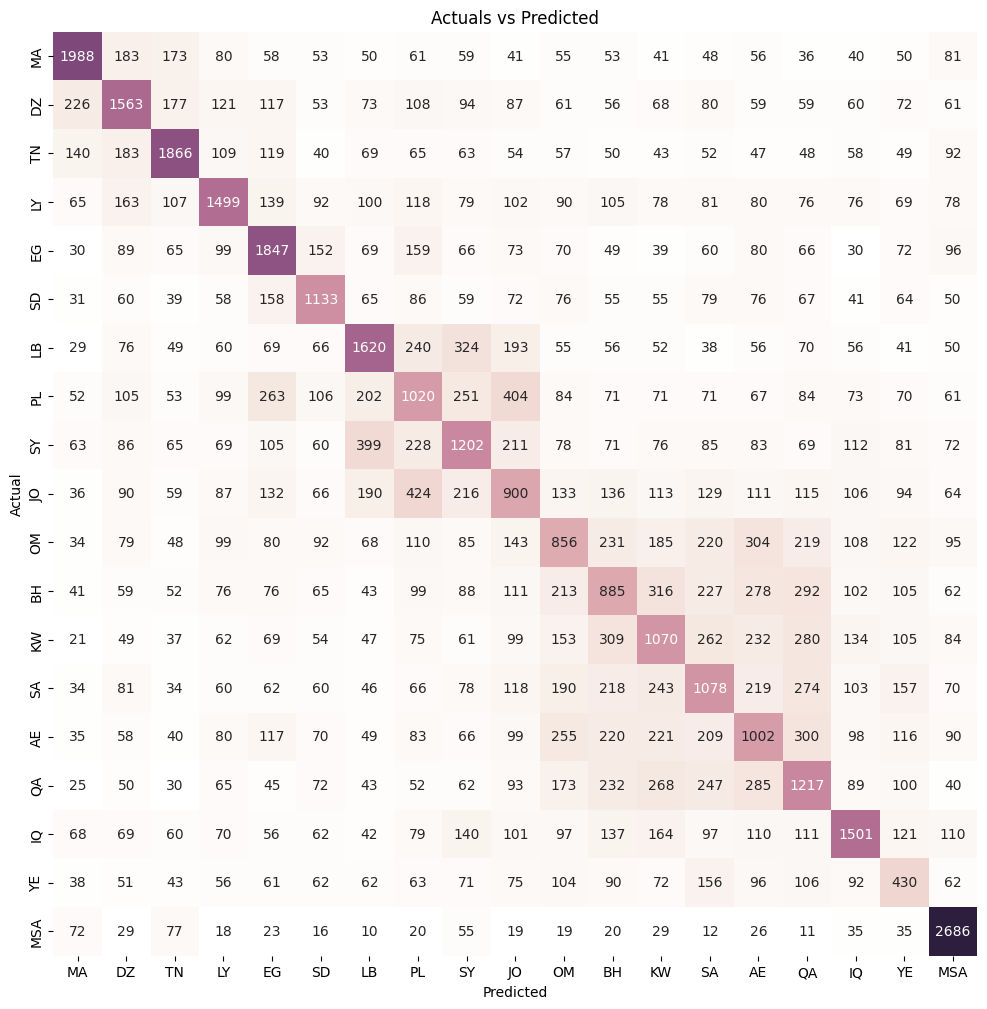

In [56]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, predicted_test_tfidf_NB,labels=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
data_cm = pd.DataFrame(data, columns=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"], index = ["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
data_cm.index.name = 'Actual'
data_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(data_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size':10})
plt.title('Actuals vs Predicted')
plt.savefig('../data/figs/NB_matrix.png')
plt.show()

In [57]:
def get_country_coordinates(country,proximity_score):
    # Define a dictionary with the latitude and longitude coordinates for each Arabic country
    country_coordinates = {
        "MA": [31.7917, -7.0926],
        "DZ": [36.7538, 3.0588],
        "TN": [33.8869, 9.5375],
        "LY": [26.3351, 17.2283],
        "EG": [26.8206, 30.8025],
        "SD": [15.5007, 32.5599],
        "LB": [33.8547, 35.8623],
        "PL": [33.8547, 35.8623],
        "SY": [34.8021, 38.9968],
        "JO": [30.5852, 36.2384],
        "OM": [21.4735, 55.9754],
        "BH": [26.0667, 50.5577],
        "KW": [29.3117, 47.4818],
        "SA": [23.8859, 45.0792],
        "AE": [23.4241, 53.8478],
        "QA": [25.3548, 51.1839],
        "IQ": [33.2232, 43.6793],
        "YE": [15.5527, 48.5164],
        "MSA": [24.0000, 45.0000]  # Placeholder coordinates for MSA
    }
    
       # Define the gradient colors from yellow to red
    colors = ["red","orange","yellow","green"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    # Map the proximity score to the gradient colormap
    color_rgb = cmap(proximity_score)

    # Convert the RGB color to hexadecimal format
    color_hex = rgb2hex(color_rgb)

    return country_coordinates.get(country, [0, 0]), color_hex

In [58]:
def predict_dialect():
    sentence = entry.get()

    if sentence.strip() == '':
        messagebox.showerror("Error", "Please enter an Arabic sentence.")
        return

    prediction = saved_model_tfidf_NB.predict([sentence])
    probabilities = saved_model_tfidf_NB.predict_proba([sentence])[0]

    result = f"The predicted dialect is: {prediction}\n"
    result += "Prediction probabilities for each dialect:\n"
    for dialect, probability in zip(saved_model_tfidf_NB.classes_, probabilities):
        result += f"{dialect}: {probability:.4f}\n"
        
        # Create a map centered around Arabic countries
    m = folium.Map(location=[24, 43], zoom_start=4)

    # Add a marker for the predicted dialect country
    predicted_country = prediction[0]
    folium.Marker(location=get_country_coordinates(predicted_country, 0)[0],
                  popup=f"Predicted: {predicted_country}",
                  icon=folium.Icon(color='green', icon='info-sign')).add_to(m)

    # Add heatmap layers for each Arabic country
    for dialect, probability in zip(saved_model_tfidf_NB.classes_, probabilities):
        proximity_score = 1 - probability  # Calculate the proximity score
        coordinates, color = get_country_coordinates(dialect, proximity_score)  # Get coordinates and color
        folium.CircleMarker(location=coordinates,
                            radius=10,
                            color='{}'.format(color),
                            fill=True,
                            fill_color='{}'.format(color),
                            fill_opacity=0.7).add_to(m)

    # Save the map as an HTML file
    map_file = 'heatmap_NB.html'
    m.save(map_file)

    # Open the HTML file in a web browser
    webbrowser.open(map_file)

    messagebox.showinfo("Prediction", result)

In [60]:
root = tk.Tk()
root.title("Arabic Dialect Predictor - NB Model")

label = tk.Label(root, text="Enter an Arabic sentence:")
label.pack()

entry = tk.Entry(root, width=50)
entry.pack()

button = tk.Button(root, text="Predict", command=predict_dialect)
button.pack()

root.mainloop()

#ff0000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#008000
#ff0000
#008000
